<a href="https://colab.research.google.com/github/moises-rb/DataScienceOne/blob/main/IA_Aplicada_DataScience%20/Projeto_Inicial_IA_aplicada_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <strong><font color="7b71ff">IA aplicada a Data Science: utilizando IA na constru√ß√£o de visualiza√ß√£o de dados</font></strong>


---

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/logos/logo_branca_fundo_azul.png" alt="inserir alt">

# **Aula 1 - Conhecendo os dados**


A **Zoop** √© uma grande varejista que atende a todas as regi√µes do Brasil por meio do seu **e-commerce**. Ela √© conhecida pela ampla variedade em seus produtos buscando atender a todo tipo de p√∫blico. Ela possui uma s√©rie de centros de distribui√ß√£o (CDs) para entrega de seus produtos, com grande parte situada no estado de S√£o Paulo.

Para gerenciar o seu alcance, bem como o faturamento de seu setor em lojas online, ela consolida os dados em diferentes per√≠odos de tempo e avalia esses dados para gerar insights e tomar algumas decis√µes estrat√©gicas em seu neg√≥cio. Neste projeto, vamos ter acesso aos dados de parte da sua clientela do e-commerce dentro do ano de 2023.  

Voc√™, como **analista de dados** da empresa, precisar√° gerar visuais que auxiliem na constru√ß√£o de relat√≥rios de acordo com algumas premissas passadas pelas partes interessadas realizando uma r√°pida an√°lise do p√∫blico que possuimos na loja virtual e do faturamento da empresa.

**Problema de neg√≥cio:**

O time de dados da **Zoop** precisa extrair os dados e gerar informa√ß√µes por meio de visuais que possam ser apresentados a diretoria da empresa apontando os dados de faturamento, perfil do cliente e outros indicadores que possam auxiliar na tomada de decis√£o em sua loja online.

**Base de dados**

Vamos importar duas bases de dados:

> Dados de clientes do e-commerce da Zoop, separados pelo c√≥digo identificador da compra.

> Dados de vendas do e-commerce da Zoop em 2023, separados pelo c√≥digo identificador da compra.

Esses dados ser√£o lidos a partir do reposit√≥rio compartilhado pelo GitHub.

**Desafio**

Voc√™, como analista de dados do time de dados da Zoop, tem o desafio de extrair os dados de ambas as bases e construir visuais que possam agregar valor a apresenta√ß√£o dos resultados da Zoop em 2023. Para isso, ser√£o repassados ao todo **7 questionamentos** que foram separados para que voc√™ possa contribuir na constru√ß√£o do storytelling das vendas da empresa.

Para agilizar o processo da an√°lise explorat√≥ria dos dados (AED) e a cria√ß√£o dos visuais, utilizaremos a IA do **ChatGPT** como nossa assistente, tudo isso levando em conta o prazo curto para as an√°lises e a qualidade da entrega.


## **1.2 - Obtendo os dados**

---



Vamos inicialmente passar o link do reposit√≥rio com as duas bases que utilizaremos no projeto:

In [ ]:
url_clientes = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_clientes.csv"
url_vendas = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_vendas.csv"

Ap√≥s esta etapa, vamos criar 2 dataframes com os dados dos clientes e das vendas da Zoop separadamente e dar uma pequena checada nas tabelas extra√≠das.

In [ ]:
import pandas as pd

In [ ]:
clientes = pd.read_csv(url_clientes)
vendas = pd.read_csv(url_vendas)

In [ ]:
clientes.head()

ID_compra  ID_cliente     cidade                   uf    regiao  idade  \
0        904        8972      Natal  Rio Grande do Norte  Nordeste     49   
1       4613        5120  S√£o Paulo            S√£o Paulo   Sudeste     49   
2       5579        1847  S√£o Paulo            S√£o Paulo   Sudeste     24   
3       2405        2846  S√£o Paulo            S√£o Paulo   Sudeste     38   
4       2485        2715   Salvador                Bahia  Nordeste     30   

  sexo_biologico cashback  avaliacao_compra  
0      Masculino      N√£o                 9  
1       Feminino      N√£o                 9  
2       Feminino      N√£o                 8  
3       Feminino      Sim                 7  
4       Feminino      N√£o                10

In [ ]:
vendas.tail()

ID_compra        data horario                   categoria  \
6164       6141  2023-12-31   17:49            Eletrodom√©sticos   
6165       6148  2023-12-31   23:02      Papelaria e escrit√≥rio   
6166       6123  2023-12-31   21:25         Alimentos e bebidas   
6167       6147  2023-12-31   21:38                      Livros   
6168       6122  2023-12-31   22:11  Beleza e cuidados pessoais   

      preco_unitario  quantidade   frete   metodo_pagamento  
6164          1509.9           5  377.48  Cart√£o de Cr√©dito  
6165            14.0           2    3.36                PIX  
6166            77.9           1    7.79  Cart√£o de Cr√©dito  
6167           142.9           4   17.15  Cart√£o de Cr√©dito  
6168            89.9           5   13.48  Cart√£o de Cr√©dito

## **1.3 - Entendendo os dados**

---



Agora, vamos explorar os dados compreendendo o que significam e como podemos relacion√°-los na constru√ß√£o dos visuais.

### **Base de clientes**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos atuar como analista de dados de um e-commerce. Recebemos duas bases de dados com os dados dos clientes e das vendas em 2023, respectivamente.

Neste primeiro momento, vamos explorar a base clientes no formato de um DataFrame, chamado "clientes". Ela cont√©m dados dos clientes que realizaram comprar na loja virtual, sendo eles: ID da compra, ID do cliente, a cidade, estado e regi√£o da compra, idade, sexo biol√≥gico, se participam do programa de cashback e avalia√ß√£o da compra.

Queremos fazer uma breve explora√ß√£o dos dados para compreender um pouco sobre eles. Lembrando que os dados desta base j√° est√£o limpos e tratados. Construa um c√≥digo para executar esta etapa usando o Python.

N√£o √© necess√°rio utilizar "print()" para mostrar o resultado das consultas.

In [ ]:
# Verificando as primeiras linhas do DataFrame para entender a estrutura
clientes.head()

ID_compra  ID_cliente     cidade                   uf    regiao  idade  \
0        904        8972      Natal  Rio Grande do Norte  Nordeste     49   
1       4613        5120  S√£o Paulo            S√£o Paulo   Sudeste     49   
2       5579        1847  S√£o Paulo            S√£o Paulo   Sudeste     24   
3       2405        2846  S√£o Paulo            S√£o Paulo   Sudeste     38   
4       2485        2715   Salvador                Bahia  Nordeste     30   

  sexo_biologico cashback  avaliacao_compra  
0      Masculino      N√£o                 9  
1       Feminino      N√£o                 9  
2       Feminino      N√£o                 8  
3       Feminino      Sim                 7  
4       Feminino      N√£o                10

In [ ]:
# Verificando informa√ß√µes gerais sobre os dados
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_compra         6169 non-null   int64 
 1   ID_cliente        6169 non-null   int64 
 2   cidade            6169 non-null   object
 3   uf                6169 non-null   object
 4   regiao            6169 non-null   object
 5   idade             6169 non-null   int64 
 6   sexo_biologico    6169 non-null   object
 7   cashback          6169 non-null   object
 8   avaliacao_compra  6169 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 433.9+ KB


In [ ]:
# Estat√≠sticas descritivas para vari√°veis num√©ricas
clientes.describe()

ID_compra   ID_cliente        idade  avaliacao_compra
count  6169.000000  6169.000000  6169.000000       6169.000000
mean   3085.000000  5461.475280    38.260010          8.443670
std    1780.981237  2610.959977     9.838951          1.730584
min       1.000000  1005.000000    18.000000          0.000000
25%    1543.000000  3148.000000    31.000000          8.000000
50%    3085.000000  5436.000000    38.000000          9.000000
75%    4627.000000  7748.000000    45.000000          9.000000
max    6169.000000  9999.000000    70.000000         10.000000

In [ ]:
# Contagem de clientes por sexo
clientes['sexo_biologico'].value_counts()

sexo_biologico
Feminino     3371
Masculino    2798
Name: count, dtype: int64

In [ ]:
# M√©dia de idade dos clientes
clientes['idade'].value_counts()

idade
35    269
39    266
38    266
40    251
34    251
45    232
36    225
41    219
42    219
32    217
37    212
31    209
43    208
33    196
44    188
46    162
18    160
29    160
30    156
48    150
47    149
50    148
49    142
27    139
28    134
26    118
25    111
23     90
51     89
55     82
52     82
24     76
54     71
53     70
21     59
22     55
56     49
57     46
19     39
20     37
58     34
60     25
59     24
61     17
62     14
65     11
63     10
64      9
70      8
66      7
67      3
68      3
69      2
Name: count, dtype: int64

In [ ]:
# Contagem de clientes por regi√£o
clientes['regiao'].value_counts()

regiao
Sudeste         2666
Nordeste        1882
Sul              819
Centro-Oeste     495
Norte            307
Name: count, dtype: int64

In [ ]:
# Avalia√ß√£o m√©dia das compras
clientes['avaliacao_compra'].mean()

np.float64(8.44366996271681)

In [ ]:
clientes['cashback'].value_counts()

cashback
N√£o    3557
Sim    2612
Name: count, dtype: int64

### **Base de vendas**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Agora vamos explorar a base de vendas no formato de um DataFrame, chamado "vendas". Ela cont√©m dados das vendas do e-commerce, sendo eles: ID da compra, data da compra, hor√°rio da compra, categoria do produto, preco unit√°rio do produto, quantidade vendida, frete e o m√©todo do pagamento.

Queremos fazer uma breve explora√ß√£o dos dados para compreender um pouco sobre eles. Lembrando que os dados desta base tamb√©m j√° est√£o limpos e tratados. Construa um c√≥digo para executar esta etapa usando o Python.

In [ ]:
# Visualizando as primeiras linhas do DataFrame
vendas.head()

ID_compra        data horario                   categoria  preco_unitario  \
0          6  2023-01-03   20:40                 Eletr√¥nicos          4457.9   
1          5  2023-01-03   21:48    Ferramentas e constru√ß√£o           115.9   
2          9  2023-01-03   17:08  Beleza e cuidados pessoais            68.9   
3          4  2023-01-03   14:29    Ferramentas e constru√ß√£o            80.9   
4          8  2023-01-03   18:02  Beleza e cuidados pessoais           165.0   

   quantidade   frete   metodo_pagamento  
0           4  713.26             Boleto  
1           1    0.00                PIX  
2           2   13.78  Cart√£o de Cr√©dito  
3           5   40.45                PIX  
4           4    0.00                PIX

In [ ]:
# Verificando as informa√ß√µes gerais do DataFrame
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_compra         6169 non-null   int64  
 1   data              6169 non-null   object 
 2   horario           6169 non-null   object 
 3   categoria         6169 non-null   object 
 4   preco_unitario    6169 non-null   float64
 5   quantidade        6169 non-null   int64  
 6   frete             6169 non-null   float64
 7   metodo_pagamento  6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [ ]:
vendas['data'] = pd.to_datetime(vendas['data'], format="%Y-%m-%d")

In [ ]:
# Gerando estat√≠sticas descritivas para vari√°veis num√©ricas
vendas.describe()

ID_compra                           data  preco_unitario  \
count  6169.000000                           6169     6169.000000   
mean   3085.000000  2023-08-20 00:12:22.292105984      873.234738   
min       1.000000            2023-01-03 00:00:00        2.900000   
25%    1543.000000            2023-05-30 00:00:00       44.900000   
50%    3085.000000            2023-08-31 00:00:00       93.900000   
75%    4627.000000            2023-11-23 00:00:00      221.900000   
max    6169.000000            2023-12-31 00:00:00     8000.000000   
std    1780.981237                            NaN     1852.064342   

        quantidade        frete  
count  6169.000000  6169.000000  
mean      3.004863   119.233832  
min       1.000000     0.000000  
25%       2.000000     0.320000  
50%       3.000000     7.550000  
75%       4.000000    29.240000  
max       5.000000  4521.540000  
std       1.420725   366.149225

In [ ]:
# Contagem de vendas por categoria de produto
vendas['categoria'].value_counts()

categoria
Alimentos e bebidas           1495
Beleza e cuidados pessoais    1062
Casa e limpeza                1041
Eletrodom√©sticos               665
Eletr√¥nicos                    580
Papelaria e escrit√≥rio         551
Ferramentas e constru√ß√£o       474
Livros                         301
Name: count, dtype: int64

In [ ]:
# Pre√ßo m√©dio unit√°rio dos produtos
vendas['preco_unitario'].mean()

np.float64(873.2347382071648)

In [ ]:
# Quantidade total de produtos vendidos
vendas['quantidade'].sum()

np.int64(18537)

In [ ]:
# Valor total do frete arrecadado
vendas['frete'].sum()

np.float64(735553.51)

In [ ]:
# Frequ√™ncia dos m√©todos de pagamento
vendas['metodo_pagamento'].value_counts()

metodo_pagamento
Cart√£o de Cr√©dito    2851
PIX                  2244
Cart√£o de D√©bito      547
Boleto                527
Name: count, dtype: int64

## **1.4 - Tipos de gr√°ficos**

---



J√° exploramos um pouco das duas bases do projeto e obtivemos alguns insights interessantes que podem ser importantes na constru√ß√£o de nossas visuais.

Agora, vamos tentar simplificar a nossa an√°lise consolidando os dados em uma √∫nica tabela para a partir da√≠ debru√ßar nas possibilidades de visuais combinando os dados. Ser√° que o GPT pode nos ajudar aqui?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos agora unir as duas bases do nosso projeto em uma s√≥ utilizando como chave a coluna "ID_compra". Al√©m disso, vamos organizar as colunas na seguinte sequ√™ncia:

* ID_compra
* data
* horario
* categoria
* preco_unitario
* quantidade
* frete
* metodo_pagamento
* ID_cliente
* idade
* sexo_biologico
* cidade
* uf
* regiao
* cashback
* avaliacao_compra

Construa um c√≥digo para executar esta etapa usando o Python e a biblioteca Pandas.

In [ ]:
# Realizar o merge das bases utilizando a chave 'ID_compra'
df = pd.merge(vendas, clientes, on='ID_compra', how='inner')

# Definir a ordem desejada das colunas
ordem_colunas = [
    'ID_compra',
    'data',
    'horario',
    'categoria',
    'preco_unitario',
    'quantidade',
    'frete',
    'metodo_pagamento',
    'ID_cliente',
    'idade',
    'sexo_biologico',
    'cidade',
    'uf',
    'regiao',
    'cashback',
    'avaliacao_compra'
]

# Aplicar a reorganiza√ß√£o das colunas
df = df[ordem_colunas]

# Visualizar as primeiras linhas da base organizada
df.head()

# Se quiser, pode salvar o resultado em um novo arquivo CSV
#df.to_csv('base_unificada.csv', index=False)


ID_compra       data horario                   categoria  preco_unitario  \
0          6 2023-01-03   20:40                 Eletr√¥nicos          4457.9   
1          5 2023-01-03   21:48    Ferramentas e constru√ß√£o           115.9   
2          9 2023-01-03   17:08  Beleza e cuidados pessoais            68.9   
3          4 2023-01-03   14:29    Ferramentas e constru√ß√£o            80.9   
4          8 2023-01-03   18:02  Beleza e cuidados pessoais           165.0   

   quantidade   frete   metodo_pagamento  ID_cliente  idade sexo_biologico  \
0           4  713.26             Boleto        6149     30      Masculino   
1           1    0.00                PIX        9491     36      Masculino   
2           2   13.78  Cart√£o de Cr√©dito        5288     39       Feminino   
3           5   40.45                PIX        9679     35      Masculino   
4           4    0.00                PIX        1380     50      Masculino   

         cidade                 uf    regiao cashback  avaliacao_compra  
0  Porto Alegre  Rio Grande do Sul       Sul      Sim                10  
1     S√£o Paulo          S√£o Paulo   Sudeste      Sim                 8  
2   Porto Velho           Rond√¥nia     Norte      N√£o                 7  
3        Recife         Pernambuco  Nordeste      Sim                 9  
4     S√£o Paulo          S√£o Paulo   Sudeste      N√£o                 9

Agora vamos pedir ao ChatGPT ideias de visuais que podemos construir com esses dados.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Agora com o nosso "df" j√° constru√≠do por meio das duas bases do projeto, vamos iniciar um novo processo. Queremos iniciar a etapa da gera√ß√£o dos visuais que possam auxiliar na an√°lise do faturamento ao longo do ano, perfil do cliente e outros dados que possam ser relevantes √† an√°lise e constru√ß√£o do nosso storytelling.

As colunas de "df" s√£o:

* ID_compra: n√∫mero √∫nico atribu√≠do a compra realizada, no formato int
* data: data da compra, no formato datetime
* horario: hor√°rio da compra no formato object
* categoria: categoria do produto, no formato object
* preco_unitario: pre√ßo de uma unidade do produto, no formato float
* quantidade: quantidade vendida do produto, no formato int
* frete: frete a ser pago no total da compra, no formato float
* metodo_pagamento: m√©todo de pagamento da compra, no formato object
* ID_cliente: n√∫mero √∫nico atribu√≠do ao cliente, no formato int
* idade: idade do cliente, no formato int
* sexo_biologico: sexo biol√≥gico do cliente, no formato object
* cidade: cidade do cliente, no formato object
* uf: unidade federativa do cliente, no formato object
* regiao: regi√£o do cliente, no formato object
* cashback: se o cliente participa ou n√£o do programa de cashback da loja, no formato object
* avaliacao_compra: avalia√ß√£o do cliente pela compra, no formato int

O objetivo √© abstrair e buscar rela√ß√µes para construir visuais interessantes para a an√°lise dos dados dos clientes e vendas da Zoop.

Com base nas informa√ß√µes fornecidas, quais tipos de visualiza√ß√µes seriam √∫teis para atingir o objetivo de analisar os dados?

### ***Sugest√µes do ChatGPT***:


Com base nas informa√ß√µes fornecidas sobre as colunas do DataFrame "df", aqui est√£o algumas sugest√µes de visualiza√ß√µes que podem ser √∫teis para analisar os dados dos clientes e vendas da Zoop:

1. **Gr√°fico de Linha Temporal para Faturamento ao Longo do Ano:**
   - Utilize a coluna "data" para criar um gr√°fico de linha mostrando o faturamento total ao longo do ano. Isso pode ser mensal, semanal ou di√°rio, dependendo da granularidade dos seus dados.

2. **Gr√°fico de Barras para Categorias de Produtos Vendidos:**
   - Utilize a coluna "categoria" para criar um gr√°fico de barras mostrando a distribui√ß√£o das vendas por categoria de produtos. Isso pode ajudar a identificar as categorias mais populares.

3. **Gr√°fico de Barras ou Pizza para M√©todos de Pagamento:**
   - Utilize a coluna "metodo_pagamento" para criar um gr√°fico de barras ou pizza mostrando a distribui√ß√£o de m√©todos de pagamento utilizados pelos clientes.

4. **Gr√°fico de Dispers√£o para Relacionamento entre Idade e Avalia√ß√£o de Compra:**
   - Utilize as colunas "idade" e "avaliacao_compra" para criar um gr√°fico de dispers√£o e verificar se h√° alguma correla√ß√£o entre a idade dos clientes e a avalia√ß√£o da compra.

5. **Gr√°fico de Barras para Participa√ß√£o no Programa de Cashback:**
   - Utilize a coluna "cashback" para criar um gr√°fico de barras mostrando a participa√ß√£o dos clientes no programa de cashback.

6. **Mapa de Calor para Correla√ß√µes:**
   - Crie um mapa de calor usando as correla√ß√µes entre diferentes vari√°veis. Isso pode ajudar a identificar padr√µes e rela√ß√µes entre as diferentes caracter√≠sticas dos clientes e as transa√ß√µes.

7. **Gr√°fico de Boxplot para Pre√ßo Unit√°rio por Categoria de Produto:**
   - Utilize as colunas "preco_unitario" e "categoria" para criar um gr√°fico de boxplot e identificar a variabilidade de pre√ßos em diferentes categorias de produtos.

8. **Gr√°fico de Barras para Avalia√ß√µes M√©dias por Regi√£o:**
   - Utilize as colunas "avaliacao_compra" e "regiao" para criar um gr√°fico de barras mostrando as avalia√ß√µes m√©dias das compras em diferentes regi√µes.

Essas s√£o apenas algumas ideias iniciais, e a escolha das visualiza√ß√µes depender√° dos insights espec√≠ficos que voc√™ busca e dos questionamentos que deseja responder com a an√°lise dos dados. </font>


> O ChatGPT trouxe algumas ideias interessantes para cria√ß√£o dos gr√°ficos.
>
> Por√©m, como j√° possuimos alguns questionamentos para nos orientar na cria√ß√£o dos visuais, n√£o vamos seguir todas as sugest√µes aqui apontadas.
>
> Fica como uma sugest√£o para te auxiliar quando voc√™ estiver trabalhando com outras bases e estiver com dificuldade em pensar em quais visuais voc√™ poder√° construir.
>
> **Observa√ß√£o:** Lembrando que √© muito prov√°vel que os gr√°ficos apontados para mim, n√£o sejam necessariamente iguais aos que aparecer√° para voc√™, dado a aletoriedade das respostas de qualquer IA generativa.

# **Aula 2 - Visualizando os dados**




## **2.1 - Definindo os visuais**

---



Ap√≥s a etapa de explora√ß√£o dos dados, vamos ler as quest√µes que foram levantadas na demanda que recebemos. Assim, come√ßaremos a pensar nos visuais que iremos construir com o aux√≠lio da IA.

### **Questionamentos**

#### Vendas

1.   Quais foram os m√©todos de pagamentos mais utilizados em 2023?
2.   Qual foi o faturamento por categoria em 2023?
3.   Como foram as vendas ao longo dos meses em 2023?
4.   Como esta dividida a venda por trimestre por m√©todo de pagamento? Existe um per√≠odo em que algum tipo de pagamento se sobressai?

#### Perfil do cliente

5.   Qual a propor√ß√£o da clientela que participa de nosso programa de cashback?
6.   Como est√£o distribu√≠das as avalia√ß√µes de produto? Temos bons n√∫meros gerais?
7.   Como est√° distribu√≠do o nosso p√∫blico por idade e sexo biol√≥gico? Existe um grupo que sobressai?

Inicialmente, vamos fazer a primeira vers√£o dos gr√°ficos, ainda n√£o refinados com os elementos visuais, para mais a frente ir adicionando as diversas t√©cnicas de storytelling.

### **1¬∫ Questionamento:** Quais foram os m√©todos de pagamentos mais utilizados em 2023?

Vamos pedir ao ChatGPT para nos auxiliar na constru√ß√£o desse visual. Primeiro, vamos tratar o dado gerando uma tabela resumida (que tamb√©m √© uma esp√©cie de visual) e em seguida construir o 1¬∫ gr√°fico.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Temos um DataFrame chamado "df" e queremos construir um visual que apresente quais m√©todos de pagamentos foram os mais utilizados.

Em "df", temos a coluna "metodo_pagamento" com os 4 tipos de pagamento utilizado na compra.

Inicialmente, queremos construir uma tabela chamada "metodos_de_pagamento" que resuma os dados dessa coluna e, na sequ√™ncia, desejamos criar uma visualiza√ß√£o que apresente a quantidade desses m√©todos de pagamento presentes na tabela "metodo_pagamento".

Utilize as bibliotecas de visualiza√ß√£o de dados do Python para criar essa visualiza√ß√£o.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tabela resumo dos m√©todos de pagamento
metodos_de_pagamento = df['metodo_pagamento'].value_counts().reset_index()
metodos_de_pagamento.columns = ['metodo_pagamento', 'quantidade']

metodos_de_pagamento


metodo_pagamento  quantidade
0  Cart√£o de Cr√©dito        2851
1                PIX        2244
2   Cart√£o de D√©bito         547
3             Boleto         527

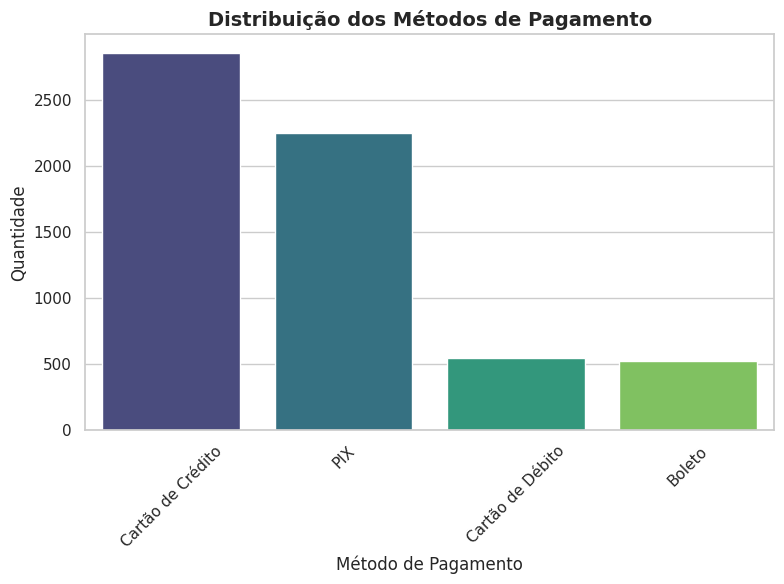

In [28]:
# Configurar o estilo dos gr√°ficos
sns.set_theme(style="whitegrid")

# Criando o gr√°fico de barras
plt.figure(figsize=(8, 6))
sns.barplot(
    data=metodos_de_pagamento,
    x='metodo_pagamento',
    y='quantidade',
    palette='viridis',
    hue='metodo_pagamento',
    dodge=False
)

plt.title('Distribui√ß√£o dos M√©todos de Pagamento', fontsize=14, weight='bold')
plt.xlabel('M√©todo de Pagamento')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Coment√°rios: </font>

---

N√≥s conseguimos observar que mesmo sem especificar o tipo de gr√°fico, pelo modo que apresentamos os dados ao ChatGPT ele conseguiu representar com sucesso um visual que traga as informa√ß√µes desejadas. Um gr√°fico de colunas realmente √© o ideal para representa√ß√£o das quantidades de uma ou mais categorias de dados.

Vamos ajustar aos poucos os visuais para que fiquem adequados para o nosso p√∫blico e que tenha a identidade visual da empresa.

## **2.2 - Comparando dados**

---



Agora que j√° criamos nosso primeiro visual, podemos prosseguir com a constru√ß√£o dos pr√≥ximos visuais. Aqui, vamos focar em gr√°ficos de compara√ß√£o para responder a mais dois questionamentos.

### **2¬∫ Questionamento:** Qual foi o faturamento por categoria em 2023?

**Observa√ß√£o:** Para o faturamento, vamos considerar aqui o produto entre o pre√ßo unit√°rio e a quantidade somadas ao frete de cada produto.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Temos um DataFrame chamado "df" e queremos construir um visual de gr√°fico de barras horizontais que apresente o faturamento por categoria da Zoop.

Em "df", temos as colunas:
* categoria: categorias dos produtos
* preco_unitario: pre√ßo de uma unidade do produto
* quantidade: quantidade vendida do produto
* frete: frete a ser pago no total da compra.

Desejamos criar uma visualiza√ß√£o que apresente o faturamento de cada categoria, em que o faturamento √© dado pelo produto entre o pre√ßo unit√°rio e a quantidade somadas ao frete.

Utilize as bibliotecas de visualiza√ß√£o de dados do Python para criar essa visualiza√ß√£o.

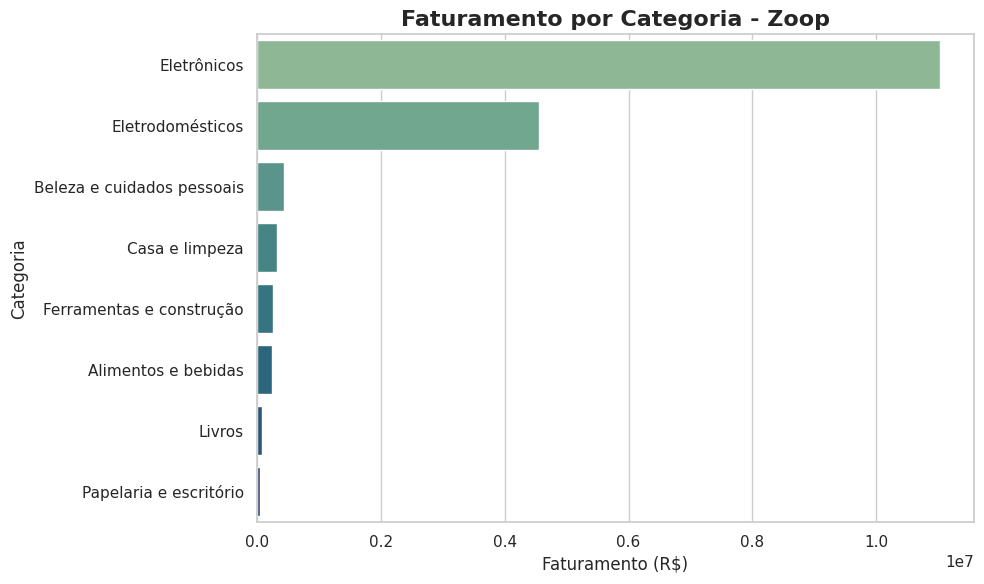

In [31]:
# üß† Criar a coluna de faturamento por linha
df['faturamento'] = (df['preco_unitario'] * df['quantidade']) + df['frete']

# üîç Agrupar por categoria e somar o faturamento
faturamento_por_categoria = df.groupby('categoria')['faturamento'].sum().reset_index()

# üî• Ordenar do maior pro menor (opcional, mas deixa lindo)
faturamento_por_categoria = faturamento_por_categoria.sort_values(by='faturamento', ascending=False)

# üé® Plotar o gr√°fico de barras horizontais
plt.figure(figsize=(10, 6))
sns.barplot(
    data=faturamento_por_categoria,
    x='faturamento',
    y='categoria',
    palette='crest',
    hue='categoria',
    dodge=False
)

plt.title('Faturamento por Categoria - Zoop', fontsize=16, weight='bold')
plt.xlabel('Faturamento (R$)')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()


<font color="7b71ff" size=4> Coment√°rios: </font>

---

Aqui especificamos o tipo de gr√°fico, guiando o ChatGPT para cria√ß√£o do nosso visual. Podemos notar que em um gr√°fico de barras o foco √© maior nas categorias, al√©m de ser uma forma mais fluida de ler textos que possam ser extensos demais para um gr√°fico de coluna.

### **3¬∫ Questionamento:** Como foram as vendas ao longo dos meses em 2023?

**Observa√ß√£o:** √â importante especificar como a sua vari√°vel tempo est√° especificada dentro da base para o ChatGPT alcan√ßar resultados melhores na sugest√£o do visual

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Temos um DataFrame chamado "df" e queremos construir um visual de gr√°fico de linha que apresente as vendas totais mensais da Zoop.

Em "df", temos as colunas:
* data: com as datas das compras no formato datetime (`aaaa-mm-dd`)
* faturamento: dado pelo produto entre o pre√ßo unit√°rio e a quantidade somadas ao frete de cada venda.

Desejamos criar uma visualiza√ß√£o que apresente as vendas por m√™s. Prmeiro, agrupe os dados por m√™s e depois crie uma nova coluna chamada "mes" que receba o nome de cada m√™s, traduzindo os meses do √≠ndice por meio do dicion√°rio abaixo. Utilize a coluna "data" para o agrupamento dos dados e constru√ß√£o do gr√°fico. A coluna "mes" s√≥ deve ser utilizada para alterar os r√≥tulos do eixo x.

```
meses = {
    'January': 'Jan',
    'February': 'Fev',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'Mai',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Set',
    'October': 'Out',
    'November': 'Nov',
    'December': 'Dez'
}
```

Utilize as bibliotecas de visualiza√ß√£o de dados do Python para criar essa visualiza√ß√£o.

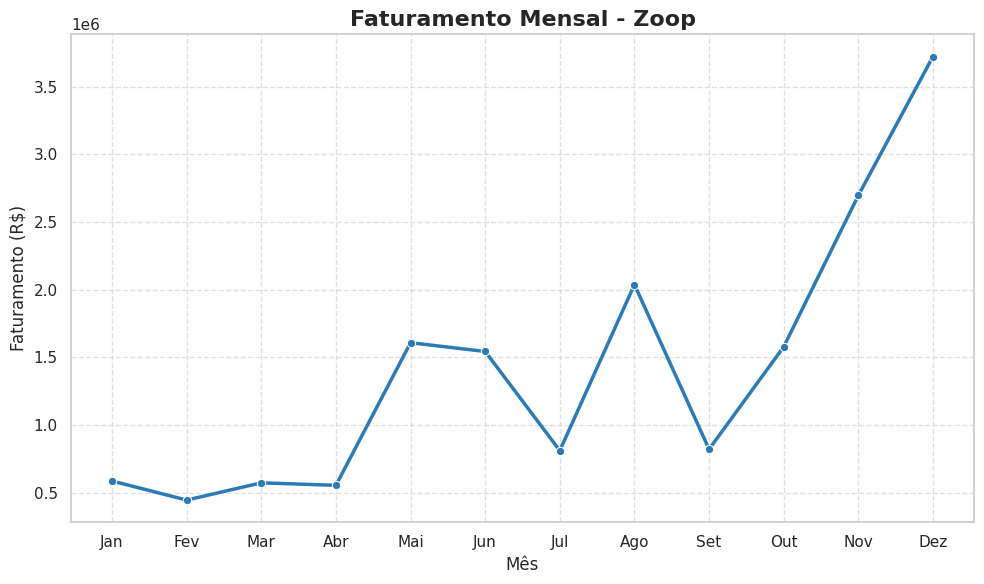

In [33]:
# üîó Dicion√°rio para tradu√ß√£o dos meses
meses = {
    'January': 'Jan',
    'February': 'Fev',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'Mai',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Set',
    'October': 'Out',
    'November': 'Nov',
    'December': 'Dez'
}

# üß† Garantir que a coluna 'data' est√° no formato datetime
df['data'] = pd.to_datetime(df['data'])

# üîç Extrair ano e m√™s da data
df['ano_mes'] = df['data'].dt.to_period('M')

# üéØ Agrupar por ano e m√™s, somando o faturamento
vendas_mensais = df.groupby('ano_mes')['faturamento'].sum().reset_index()

# üìÖ Converter 'ano_mes' para datetime (para plotar corretamente)
vendas_mensais['data'] = vendas_mensais['ano_mes'].dt.to_timestamp()

# üé® Criar coluna 'mes' para o nome abreviado do m√™s traduzido
vendas_mensais['mes'] = vendas_mensais['data'].dt.strftime('%B').map(meses)

# üî• Plotar o gr√°fico de linha
plt.figure(figsize=(10,6))
sns.lineplot(
    data=vendas_mensais,
    x='mes',
    y='faturamento',
    marker='o',
    linewidth=2.5,
    color='#2C7BB6'
)

plt.title('Faturamento Mensal - Zoop', fontsize=16, weight='bold')
plt.xlabel('M√™s')
plt.ylabel('Faturamento (R$)')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<font color="7b71ff" size=4> Coment√°rios: </font>

---

Quando possuimos uma quantidade de per√≠odos maior para os nossos dados, vale a pena recorrer a gr√°ficos de linha(s) que √© ideal para s√©ries temporais. Como nossos dados s√£o mensais, utilizar um gr√°fico de colunas, por exemplo, reduziria a percep√ß√£o de uma sequ√™ncia dos dados. Linhas d√£o uma maior sensa√ß√£o de continuidade.

Sinta-se livre para elaborar algumas hip√≥teses dos momentos de alta e baixa das compras.

## **2.3 - Compondo dados din√¢micos**

---



Construimos alguns visuais interessantes para compara√ß√£o dos dados, trazendo os faturamentos da Zoop. Agora, vamos partir para um nova categoria de visuais: composi√ß√£o.

Vamos uma composi√ß√£o din√¢mica dos dados. Para isso, vamos adicionar mais vari√°veis √† an√°lise, trazendo 3 diferentes vari√°veis sendo uma delas categ√≥rica.

### **4¬∫ Questionamento:** Como esta dividida a venda por trimestre por m√©todo de pagamento? Existe um per√≠odo em que algum tipo de pagamento se sobressai?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Temos um DataFrame chamado "df" e queremos construir um visual de gr√°fico de barras empilhadas que apresente as vendas por trimestre em rela√ß√£o ao m√©todo de pagamento da Zoop.

Em "df", temos as colunas:
* data: com as datas das compras no formato datetime (`aaaa-mm-dd`)
* faturamento: com os valores das vendas
* metodo_pagamento: com o m√©todo de pagamento escolhido na compra

Desejamos criar uma visualiza√ß√£o que apresente as vendas por trimestre, agrupando os m√©todos de pagamento de cada trimestre correspondente a cada compra.

Utilize as bibliotecas de visualiza√ß√£o de dados do Python para criar essa visualiza√ß√£o.

<font color="7b71ff" size=4> Coment√°rios: </font>

---

O gr√°fico de colunas empilhadas adiciona √† compara√ß√£o entre per√≠odos ou categorias a compara√ß√£o tamb√©m entre os dados de cada per√≠odo/categoria. √â como se coloc√°ssemos uma "lupa" em cada coluna e vizualiz√°ssemos a composi√ß√£o de cada uma delas de acordo com a vari√°vel desejada (aqui, as formas de pagamento).

Sinta-se livre para elaborar algumas hip√≥teses das vendas pelo trimestre combinados ao tipo de pagamento e quais insights podemos retirar dessa base.

# **Aula 3 - Gerando mais visuais**




Agora, vamos nos concentrar nos questionamentos voltados ao perfil dos(as) clientes, como avaliam as compras dentro da Zoop e se participam de nosso programa de cashback.

## **3.1 - Compondo dados est√°ticos**

---



Vamos inicialmente trazer um exemplo de como podemos utilizar a compara√ß√£o de dados est√°ticos, ou seja, um recorte do tempo ou das vari√°veis que possu√≠mos.

### **5¬∫ Questionamento:** Qual a propor√ß√£o da clientela que participa de nosso programa de cashback?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Temos um DataFrame chamado "df" e queremos construir um visual que apresente a propor√ß√£o dos(as) usu√°rios(as) que est√£o aderindo o programa de cashback da Zoop.

Em "df", temos a coluna "cashback" que disp√µe de tais dados.

Utilize as bibliotecas de visualiza√ß√£o de dados do Python para criar essa visualiza√ß√£o.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Voc√™ conseguiria inverter as cores e alterar o gr√°fico anterior para um do tipo rosca?

Utilize as bibliotecas de visualiza√ß√£o de dados do Python para criar essa visualiza√ß√£o.

<font color="7b71ff" size=4> Coment√°rios: </font>

---

Olha s√≥! Mais uma vez a IA nos apresentou uma boa no√ß√£o de qual gr√°fico aplicar para esse ponto, mas voc√™ conseguiu notar que "ela" n√£o faz ideia dos dados que possu√≠mos?

Precisamos estar atentos(as) a isso, pois passamos apenas os nomes das colunas e que dados existiam l√°. Ela n√£o consegue saber o que √© um valor de car√°ter positivo ou negativo, por exemplo. Por isso, o "n√£o" estava em azul e o "sim" em vermelho.  No prompt seguinte, demos uma orienta√ß√£o para inverter as cores (ainda sem falar o real valor dos dados) e pedimos uma altera√ß√£o do visual.

Que tal voc√™ experimentar fazer outros pedidos e ver como o ChatGPT se comporta?

Falando do gr√°fico, gr√°ficos de setores s√£o ideiais para poucas categorias de dados, se poss√≠vel dados dicot√¥micos (2 categorias, como sim e n√£o, gato e cachorro...). Eles representam a propor√ß√£o dos dados de maneira est√°tica.

## **3.2 - Distribuindo dados**

---



Com o aux√≠lio da IA, vamos gerar mais alguns gr√°ficos que ser√£o importantes na constru√ß√£o do storytelling do relat√≥rio da Zoop como requisitado. Partindo agora, da distribui√ß√£o de dados, vamos analisar o perfil dos clientes e como eles avaliam as compras na Zoop

### **6¬∫ Questionamento:** Como est√£o distribuidas as avalia√ß√µes de produto? Temos bons n√∫meros gerais?

Vamos pedir ao ChatGPT para nos auxiliar na constru√ß√£o desse visual. Vamos ver se esta IA consegue representar tais dados com um visual adequado.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Temos um DataFrame chamado "df" e queremos construir um visual que apresente a distribui√ß√£o das avalia√ß√µes do p√∫blico em rela√ß√£o as compras feitas na loja online.

Em "df", temos a coluna "avaliacao_compra" com as notas dadas por cada usu√°rio em rela√ß√£o a compra que fizeram que variam de 0 a 10 em n√∫meros inteiros.

Desejamos criar uma visualiza√ß√£o que apresente a distribui√ß√£o desses dados.

Utilize as bibliotecas de visualiza√ß√£o de dados do Python para criar essa visualiza√ß√£o.

<font color="7b71ff" size=4> Coment√°rios: </font>

---

Mais uma vez n√£o precisamos especificar diretamente o tipo de gr√°fico, pois ao citar distribui√ß√£o de valores num√©ricos de uma simples coluna o ChatGPT conseguiu interpretar e trazer o c√≥digo para um histograma de coluna. Este gr√°fico √© ideal para apresentar a distribui√ß√£o de uma amostra de dados ou popula√ß√£o. Cada coluna aqui representa a frequ√™ncia de repeti√ß√£o de um valor.

Quer experimentar fazendo o mesmo apenas com as idades?

## **3.3 - Distribuindo por caracter√≠stica**

---



Vamos agora para a cria√ß√£o do nosso √∫ltimo visual. Subindo mais um degrau na distribui√ß√£o de dados, iremos adcionar uma vari√°vel categ√≥rica ao problema. Vamos ver como a IA se comporta aqui?

### **7¬∫ Questionamento:** Como est√° distribu√≠do o nosso p√∫blico por idade e sexo biol√≥gico? Existe um grupo que sobressai?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Temos um DataFrame chamado "df" e queremos construir um visual que apresente a distribui√ß√£o do nosso p√∫blico por idade e sexo biol√≥gico.

Em "df", temos as colunas:
* idade: idade da pessoa que realizou a compra
* sexo_biologico: sexo biol√≥gico da pessoa que realizou a compra, com dados categ√≥ricos

Desejamos criar uma visualiza√ß√£o que apresente a distribui√ß√£o desses dados.

Utilize as bibliotecas de visualiza√ß√£o de dados do Python para criar essa visualiza√ß√£o.

O gr√°fico gerado √© pouco pr√°tico, pois compila os dados do sexo biol√≥gico "Masculino" e "Feminino" em uma mesma barra! Precisamos trazer mais uma instru√ß√£o ao GPT para escolher um visual mais adequado.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Acho que podemos melhorar esse gr√°fico. Que tal mudar para um boxplot?

<font color="7b71ff" size=4> Coment√°rios: </font>

---

Dessa vez foi necess√°rio guiar a IA a fim de gerar um visual melhor para nossas an√°lises.

O gr√°fico aqui representado √© um boxplot (diagrama de caixa) que √© ideal para representar um conjunto de dados de acordo com 5 medidas de interesse: valor m√°ximo, m√≠nimo, 1¬∫ quartil (onde est√£o situados os primeiros 25% dos dados), 2¬∫ quartil ou mediana (onde est√£o situados 50% dos dados) e 3¬∫ quartil (onde est√£o situados 75% dos dados).

Lembra do `describe()`? Este gr√°fico apresenta em um √∫nico elemento boa parte dos dados que a fun√ß√£o exibe em tabela.

Conclu√≠mos a 1¬™ vers√£o dos 7 visuais que utilizaremos em nosso projeto. Agora, vamos partir para a aplica√ß√£o das t√©cnicas de storytelling para melhorar os visuais e deix√°-los com a identidade visual da Zoop antes da exporta√ß√£o.


# **Aula 4 - T√©cnicas de storytelling**




## **4.1 - Definindo as cores do projeto**

---



Agora, vamos explorar a import√¢ncia das cores na visualiza√ß√£o de dados, discutir como as pessoas percebem e interpretam as informa√ß√µes visuais, e abordar a diferen√ßa entre a capacidade da intelig√™ncia artificial e a vis√£o humana no que diz respeito √† escolha de cores e acessibilidade.

### Paleta de cores da Zoop:

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/zoop_paleta_cores.png" alt="inserir alt" width=480>

&nbsp;

#### Paleta do projeto

|Vermelho|||
|------|------|------|
| VERMELHO_1 |VERMELHO_2 |VERMELHO_3 |
|#e23155 | #cc2c4e| #b32742 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_3.png) |

&nbsp;

|Azul|||
|------|------|------|
| AZUL_1 |AZUL_2 |AZUL_3 |
|#203f75 | #1c3867| #19325b |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_3.png) |

&nbsp;

|Cinza||||||
|------|------|------|------|------|------|
|BRANCO| CINZA_1 |CINZA_2 |CINZA_3 |CINZA_4 |CINZA_5 |
|#ffffff | #ebebeb | #d9d9d9| #cccccc | #555655| #231f20 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/BRANCO.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_1.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_3.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_4.png)|![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_5.png)|

&nbsp;

|Aqua|||
|------|------|------|
| AQUA_1 |AQUA_2 |AQUA_3 |
|#addcd4 | #9fccc5| #96bfb9 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_3.png) |

&nbsp;


In [ ]:
# Adicionando as cores como vari√°veis do projeto
VERMELHO_1,	VERMELHO_2,	VERMELHO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BRANCO,	CINZA_1, CINZA_2, CINZA_3, CINZA_4,	CINZA_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

<font size=5> ***Por que definimos n√≥s mesmos as cores do projeto?*** </font>

1. **Percep√ß√£o humana das cores:**

Nosso c√©rebro interpreta as cores de maneira √∫nica, associando emo√ß√µes e significados a cada tonalidade. √â importante na escolha das cores para representar dados considerar a percep√ß√£o humana para garantir que as informa√ß√µes sejam transmitidas de maneira clara e eficaz. Al√©m de seguir a identidade visual da Zoop, ou seja, deixar aquela sensa√ß√£o de que aquele visual √© da Zoop.

2. **Acessibilidade:**

Certas combina√ß√µes de cores podem ser dif√≠ceis de serem percebidas por pessoas com defici√™ncias visuais. Nossa responsabilidade como desenvolvedores √© garantir que nossas visualiza√ß√µes sejam inclusivas. Vamos seguir aqui algumas diretrizes e recomenda√ß√µes para criar gr√°ficos acess√≠veis.

3. **IA vs. escolha de cores:**

Enquanto a IA pode realizar tarefas complexas, como an√°lise de dados e reconhecimento de padr√µes, ela ainda n√£o possui o discernimento humano quando se trata de escolher cores significativas e garantir a acessibilidade. √â aqui que nossa interven√ß√£o criativa e considera√ß√£o humana entram em cena.

4. **Experi√™ncia visual:**

As pessoas conseguem entender as informa√ß√µes transmitidas pelos gr√°ficos? Existe alguma "briga" entre as cores que prejudica a clareza da mensagem? Vamos explorar t√©cnicas para melhorar a experi√™ncia visual, como contraste adequado, pela escolha cuidadosa das cores da paleta e destaque de elementos-chave.

Vamos agora mergulhar na pr√°tica e incorporar esses conceitos ao nosso projeto?

## **4.2 - Adicionando r√≥tulos e labels**

---



J√° criamos anteriormente os 7 visuais e definimos as cores do projeto. Agora, vamos escolher apenas um dos visuais para compreender como podemos utilizar a IA para adicionar as cores ideais, os r√≥tulos dos dados, t√≠tulos e labels dos eixos.

Vamos ent√£o pegar o c√≥digo daquele primeiro gr√°fico (**M√©todos de pagamento utilizados**) e explorar essas altera√ß√µes por meio da utiliza√ß√£o da IA

In [ ]:
# Visualiza√ß√£o
plt.figure(figsize=(10, 6))
plt.bar(metodos_de_pagamento['Metodo de Pagamento'], metodos_de_pagamento['Quantidade'], color='skyblue')
plt.title('Quantidade de M√©todos de Pagamento Utilizados')
plt.xlabel('M√©todo de Pagamento')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')

# Exibir o gr√°fico
plt.show()

NameError: name 'plt' is not defined

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Agora chegou a hora de refinarmos as nossas visualiza√ß√µes. Vamos come√ßar com o 1¬∫ gr√°fico que fizemos, aquele com os m√©todos de pagamento?

O nosso gr√°fico precisa seguir a identidade visual da Zoop, com o fundo da figura e do plot na cor CINZA_1, as colunas na cor VERMELHO_1 e o tamanho da figura deve ser de (10, 6).

O t√≠tulo da figura √© "M√©todos de pagamentos mais utilizados em 2023" com tamanho 18 e sua cor CINZA_5.

Os r√≥tulos do eixo y (yticks) devem ser suprimidos assim como o label do eixo y (ylabel) e os r√≥tulos e label do eixo X (xticks e xlabel) devem ter tamanho 12 com a cor AZUL_1. As bordas do topo, lado direito e esquerdo do gr√°fico devem ser suprimidas.

Al√©m disso, √© necess√°rio exibir o total de cada m√©todo de pagamento acima de cada coluna, com o texto tamb√©m na cor AZUL_1 e tamanho 12.

Utilize as bibliotecas de visualiza√ß√£o de dados do Python para criar essa visualiza√ß√£o. Lembre-se que as vari√°veis das cores que estamos utilizando possui valores de cores j√° em hexadecimal.

<font color="7b71ff" size=4> Coment√°rios: </font>

---

Uau! Parece outro gr√°fico n√£o √© mesmo?

Retiramos muitos elementos distratores e adicionamos apenas a informa√ß√£o que nos interessava. Al√©m disso mudamos o visual de um estado gen√©rico para um formato que casa com a identidade da Zoop, deixando nosso gr√°fico pronto para ser utilizado, por exemplo, no relat√≥rio das vendas.

Mais a frente traremos essas a√ß√µes para os outros visuais. O nosso foco aqui √© entender as t√©cnicas de storytelling e como aliar elas a IA pode ser bastante √∫til.

## **4.3 - Adicionando textos**

---



J√° refinamos um dos gr√°ficos na etapa anterior. Agora, vamos trazer esse gr√°fico, adicionando mais um elemento que pode ser importante √†s an√°lises: textos informativos. Vamos utilizar a IA novamente para esse processo.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

O gr√°fico ficou muito bom!

Agora quero adicionar um texto dentro da √°rea do plot, vamos l√°?

Para isso, some os valores das duas primeiras colunas, divida pela soma de totas as colunas e passe para o formato de porcentagem armazenando na vari√°vel "percentual"

Agora, na posi√ß√£o x = 2 e y = 2500, adicione o seguinte texto com tamanho 10 e cor AZUL_3: `f"$\\bf{percentual:.2f}$% dos clientes utilizam Cart√£o de Cr√©dito ou PIX \npara pagamento. Seria interessante recorrer a parcerias\ncom bancos para a constru√ß√£o de um Zoop Pay a fim\nde fidelizar a nossa clientela."`.

<font color="7b71ff" size=4> Coment√°rios: </font>

---

Aproveitamos a √°rea √∫til para trazer um *insight* que tivemos ao descrever os dados dos m√©todos de pagamento. Isso j√° aumenta e muito a relev√¢ncia do dado representado e fornece mais informa√ß√£o a quem l√™.

## **4.4 - Adicionando elementos visuais**

---



Bem bacana o uso dos textos informativos, n√£o √© mesmo? E se agora n√≥s adicionarmos outros elementos visuais a um de nossos gr√°ficos?

Vamos escolher agora o gr√°fico de linha (**Vendas totais mensais da Zoop**) e aplicar mais uma t√©cnica a ele por meio da utiliza√ß√£o da IA .

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dicion√°rio de tradu√ß√£o de meses
meses = {
    'January': 'Jan',
    'February': 'Fev',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'Mai',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Set',
    'October': 'Out',
    'November': 'Nov',
    'December': 'Dez'
}

# Agrupar por m√™s e calcular as vendas totais
df['mes'] = df['data'].dt.strftime('%B')
vendas_mensais = df.groupby('mes')['faturamento'].sum().reindex(meses.keys())

# Configura√ß√µes do gr√°fico
plt.figure(figsize=(12, 6))
plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color='#1890FF', linewidth=2)

# Adicionar r√≥tulos e t√≠tulo
plt.title('Vendas Totais Mensais da Zoop', fontsize=18, color='#555555')
plt.xlabel('M√™s', fontsize=12, color='#1890FF')
plt.ylabel('Vendas', fontsize=12, color='#1890FF')

# Alterar r√≥tulos do eixo x utilizando o dicion√°rio de tradu√ß√£o
plt.xticks(vendas_mensais.index, [meses[mes] for mes in vendas_mensais.index], fontsize=10, color='#1890FF')

plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos explorar mais um dos gr√°ficos que fizemos? Agora vamos utilizar aquele com as Vendas totais mensais da Zoop. A vari√°vel que passa os valores mensais √©:

```
df['mes'] = df['data'].dt.strftime('%B')
vendas_mensais = df.groupby('mes')['faturamento'].sum().reindex(meses.keys())
```

Em que `df["data"]` correspondente as datas no formato datetime e `df['faturamento']` os valores das vendas.

E o que gerou o gr√°fico original foi

```
plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color='#1890FF', linewidth=2)
```

O nosso gr√°fico precisa seguir a identidade visual da Zoop, com o fundo da figura e do plot na cor CINZA_1, a linha na cor AZUL_1 e o tamanho da figura deve ser de (12, 6).

O t√≠tulo da figura √© "Vendas totais mensais em 2023" com tamanho 18 e sua cor CINZA_5.

Os r√≥tulos do eixo y (yticks) devem estar o formato "R$ valor M" com duas casas decimais, tamanho 12 e cor AZUL_1.

Os r√≥tulos do eixo X (xticks) devem ter tamanho 12 com a cor AZUL_1. J√° os labels do eixo x e y (xlabel e ylabel) devem ser suprimidos. As bordas do topo e lado direito do gr√°fico devem ser suprimidas.

Utilize as bibliotecas de visualiza√ß√£o de dados do Python para criar essa visualiza√ß√£o. Lembre-se que as vari√°veis das cores que estamos utilizando possui valores de cores j√° em hexadecimal.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Bacana! Agora que o nosso gr√°fico j√° est√° com a identidade visual, vamos adicionar alguns elementos visuais.

Desenhe 4 c√≠rculos de raio 200, transparentes com a borda na cor VERMELHO_1 e  com o centro nas coordenadas do 5¬∫, 8¬∫, 11¬∫ e 12¬∫  pontos, respectivamente. No lado esquerdo de cada c√≠rculo enumere de 1 a 4.

<font color="7b71ff" size=4> Coment√°rios: </font>

---

Adicionamos 4 c√≠rculos representando os pontos com maior volume de vendas da Zoop em 2023. Podemos pensar em algumas hip√≥teses:


1.   No m√™s de Maio, temos uma das datas mais relevantes em vendas: Dia das m√£es; o que pode justificar o aumento das vendas da Zoop
1.   No m√™s de Agosto, temos 2 situa√ß√µes que podem justificar, a volta √†s aulas no 2¬∫ semestre em alguns estados brasileiros e o Dia dos Pais.
3.   No m√™s de Novembro, fica o destaque a Black Friday um dos principais per√≠odos de alta das vendas, considerado de grande relev√¢ncia ao Varejo.
4.   No m√™s de Dezembro, temos o Natal e as festividades de Ano Novo. considerados, n√£o s√≥ na Zoop, o per√≠odo de maior vendas do Varejo.

Fica como dica investigar mais os dados e chegar as suas pr√≥prias conclus√µes.

Conclu√≠mos assim 2 visuais aplicando as t√©cnicas de storytelling, deixando-os com a identidade visual da Zoop e complementando-os com informa√ß√µes relevantes para a interpreta√ß√£o dos dados. Agora, vamos seguir ajustando os outros 5 visuais para no final partimos para a exporta√ß√£o dos gr√°ficos.

# **Aula 5 - Concluindo o projeto**




## **5.1 - Ajustando os visuais de compara√ß√£o**

---



Antes de ajustarmos os √∫ltimos 5 visuais de nosso projeto, vamos fazer uma pequena modifica√ß√£o nos 2 primeiros passando-os para fun√ß√£o, o que facilitar√° mais a frente quando realizarmos a exporta√ß√£o dos visuais.



### **Gr√°fico 1 - M√©todos de pagamentos mais utilizados em 2023:**

In [ ]:
def metodos_pag():
  # Agrupar por m√©todo de pagamento e contar o total de ocorr√™ncias
  metodos_de_pagamento = df['metodo_pagamento'].value_counts()

  # Calcular percentual
  total_clientes = metodos_de_pagamento.sum()
  percentual = (metodos_de_pagamento[0] + metodos_de_pagamento[1]) / total_clientes * 100

  # Configura√ß√µes do gr√°fico
  plt.figure(figsize=(10, 6), facecolor=CINZA_1)
  ax = plt.axes()
  ax.set_facecolor(CINZA_1)
  plt.bar(metodos_de_pagamento.index, metodos_de_pagamento, color=VERMELHO_1)

  # Adicionar texto com o total acima de cada barra
  for i, v in enumerate(metodos_de_pagamento):
      plt.text(i, v + 0.1, str(v), ha='center', va='bottom', color=AZUL_1, fontsize=12)

  # Adicionar texto dentro da √°rea do plot
  plt.text(2, 2500, f"$\\bf{percentual:.2f}$% dos clientes utilizam Cart√£o de Cr√©dito ou PIX \npara pagamento. Seria interessante recorrer a parcerias\ncom bancos para a constru√ß√£o de um Zoop Pay a fim\nde fidelizar a nossa clientela.",
          ha='left', va='center', color=AZUL_3, fontsize=10)

  # Configura√ß√µes adicionais
  plt.title('M√©todos de Pagamentos mais Utilizados em 2023', fontsize=18, color=CINZA_5)
  plt.xticks(fontsize=12, color=AZUL_1)
  plt.yticks([])
  plt.xlabel('M√©todo de Pagamento', fontsize=12, color=AZUL_1)
  ax.spines[['top', 'right', 'left']].set_visible(False)
  plt.grid(False)

  return plt

### **Gr√°fico 2 - Vendas totais mensais em 2023:**

In [ ]:
def vendas_mensais():
  # Dicion√°rio de tradu√ß√£o de meses
  meses = {'January': 'Jan', 'February': 'Fev', 'March': 'Mar', 'April': 'Abr',
           'May': 'Mai', 'June': 'Jun', 'July': 'Jul', 'August': 'Ago',
           'September': 'Set', 'October': 'Out', 'November': 'Nov', 'December': 'Dez'}

  # Agrupar por m√™s e calcular as vendas totais
  df['mes'] = df['data'].dt.strftime('%B')
  vendas_mensais = df.groupby('mes')['faturamento'].sum().reindex(meses.keys())

  # Configura√ß√µes do gr√°fico
  plt.figure(figsize=(12, 6), facecolor=CINZA_1)
  ax = plt.axes()
  ax.set_facecolor(CINZA_1)
  plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color=AZUL_1, linewidth=2)

  # Adicionar r√≥tulos e t√≠tulo
  plt.title('Vendas Totais Mensais em 2023', fontsize=18, color=CINZA_5)
  plt.xlabel('')
  plt.ylabel('')

  # Formatando r√≥tulos do eixo y em "R$ valor M"
  formatted_yticks = ['R$ {:.2f} M'.format(val / 1e6) for val in ax.get_yticks()]
  ax.set_yticks(ax.get_yticks()) # para evitar o Warning
  ax.set_yticklabels(formatted_yticks, fontsize=12, color=AZUL_1)

  # Adicionar c√≠rculos numerados
  for i, point in enumerate([(4, vendas_mensais.iloc[4]), (7, vendas_mensais.iloc[7]), (10, vendas_mensais.iloc[10]), (11, vendas_mensais.iloc[11])], start=1):
      plt.scatter(point[0], point[1], s=200, color='none', edgecolors=VERMELHO_1, alpha=0.7)
      plt.text(point[0] - 0.3, point[1] + 0.1, str(i), fontsize=12, color=VERMELHO_1)

  # Configura√ß√µes adicionais
  plt.xticks(vendas_mensais.index, [meses[mes] for mes in vendas_mensais.index], fontsize=12, color=AZUL_1)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  return plt

Agora que salvamos os 2 primeiros gr√°ficos em fun√ß√£o, vamos modificar mais um, **Faturamento por categoria de produto em 2023**, utilizando as t√©cnicas de storytelling que j√° aprendemos.

### **Gr√°fico 3 - Faturamento por categoria de produto em 2023:**

Vamos dar prosseguimento aos gr√°ficos gerados ao longo das aulas, partindo agora do gr√°fico de faturamento por categoria de produto aplicando as t√©cnicas de storytelling que aprendemos aqui no curso por meio da utiliza√ß√£o da IA

In [ ]:
import matplotlib.pyplot as plt

# Calcular o faturamento para cada categoria
df['faturamento'] = (df['preco_unitario'] * df['quantidade']) + df['frete']

# Agrupar por categoria e calcular o faturamento total
faturamento_por_categoria = df.groupby('categoria')['faturamento'].sum().reset_index()

# Ordenar por faturamento
faturamento_por_categoria = faturamento_por_categoria.sort_values(by='faturamento', ascending=False)

# Visualiza√ß√£o
plt.figure(figsize=(10, 8))
plt.barh(faturamento_por_categoria['categoria'], faturamento_por_categoria['faturamento'], color='skyblue')
plt.title('Faturamento por Categoria')
plt.xlabel('Faturamento')
plt.ylabel('Categoria')

plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos partir para mais um gr√°fico? Agora, vamos refinar o gr√°fico de faturamento por categoria. Lembre que esse gr√°fico foi de barras horizontais.

O nosso gr√°fico precisa seguir a identidade visual da Zoop, com o fundo da figura e do plot na cor CINZA_1, as colunas na cor AQUA_1 e o tamanho da figura deve ser de (10, 6).

O t√≠tulo da figura √© "Faturamento por categoria de produto em 2023" com tamanho 18 e sua cor CINZA_5.

Os r√≥tulos do eixo x (xticks) devem ser suprimidos assim como os labels do eixo x e y (xlabel e ylabel) e os r√≥tulos do eixo y (yticks) devem ter tamanho 12 com a cor AZUL_1. Todas as bordas do gr√°fico devem ser suprimidas.

Al√©m disso, √© necess√°rio exibir o total do faturamento de cada categoria do lado direito de cada barra, com o texto tamb√©m na cor AZUL_1 e tamanho 12.

Vamos adicionar tamb√©m um texto dentro da √°rea do plot. Para isso, divida o valor da 1¬™ barra pela soma de todas as barras e passe para o formato de porcentagem armazenando na vari√°vel "percentual"

Agora, na posi√ß√£o x = 0.4e7 e y = 5, adicione o seguinte texto com tamanho 12 e cor AZUL_3: `f"$\\bf{percentual:.2f}$% das vendas correspondem apenas as vendas de Eletr√¥nicos.\nIsso √© equivalente a quase o dobro em rela√ß√£o a todas as outras categorias\npresentes no portf√≥lio da Zoop."`.

Utilize as bibliotecas de visualiza√ß√£o de dados do Python para criar essa visualiza√ß√£o.

<font color="7b71ff" size=4> Coment√°rios: </font>

---

Fizemos com um √∫nico prompt a inser√ß√£o dos r√≥tulos, altera√ß√£o das cores e adicionamos um texto explicativo. Com a sequ√™ncia de explica√ß√µes para o ChatGPT ele nota alguns padr√µes na constru√ß√£o e cria parte dos c√≥digos mesmo sem mais detalhes.

## **5.2 - Ajustando os visuais de composi√ß√£o**

---




J√° chegamos a praticamente metade dos gr√°ficos refinados. Agora, vamos neste t√≥pico ajustar mais 2 aplicando as t√©cnicas de storytelling que aprendemos aqui no curso por meio da utiliza√ß√£o da IA.

### **Gr√°fico 4 - Vendas por trimestre e m√©todo de pagamento:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que voc√™ tenha o DataFrame "df" carregado

# Converter a coluna 'data' para o formato datetime, se ainda n√£o estiver
df['data'] = pd.to_datetime(df['data'])

# Criar uma nova coluna para identificar o trimestre
df['trimestre'] = df['data'].dt.to_period('Q')

# Agrupar por trimestre e m√©todo de pagamento, somando o faturamento
vendas_por_trimestre = df.groupby(['trimestre', 'metodo_pagamento'])['faturamento'].sum().unstack()

# Visualiza√ß√£o em gr√°fico de barras empilhadas
vendas_por_trimestre.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Vendas por Trimestre e M√©todo de Pagamento')
plt.xlabel('Trimestre')
plt.ylabel('Vendas')
plt.legend(title='M√©todo de Pagamento')

plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos agora para o gr√°fico de Vendas por Trimestre e M√©todo de Pagamento que produzimos anteriormente. Vamos refin√°-lo usando as seguintes orienta√ß√µes.

O nosso gr√°fico precisa seguir a identidade visual da Zoop, com o fundo da figura e do plot na cor CINZA_1 e o tamanho da figura deve ser de (10, 6). A sequ√™ncia de cores das colunas empilhadas (palette) √© [BRANCO, CINZA_3, AQUA_1, AQUA_3].

O t√≠tulo da figura √© "Vendas por Trimestre e M√©todo de Pagamento em 2023" com tamanho 18 e sua cor CINZA_5.

Os r√≥tulos do eixo x (xticks) precisam estar em 0 graus e ter tamanho 12 com a cor AZUL_1. Os r√≥tulos do eixo y (yticks) devem
estar no formato f"R$ valor M" sem casas decimais e os labels do eixo x e y (xlabel e ylabel) devem ser suprimidos. Todas as bordas do gr√°fico devem ser suprimidas(['top','bottom','left','right]).

Adicione tamb√©m um grid tracejado em y

Utilize as bibliotecas de visualiza√ß√£o de dados do Python para criar essa visualiza√ß√£o.

<font color="7b71ff" size=4> Coment√°rios: </font>

---

Ajustamos o gr√°fico de barras empilhadas representando com cores mais brandas os valores dos m√©todos de pagamento. Podemos notar coisas interessantes nesse gr√°fico, como: 2¬∫ e 4¬∫ tri como sendo os momentos em que a Zoop fatura mais com vendas e, tamb√©m, o aumento do pagamento das compras feitas pelos clientes por meio do cart√£o de cr√©dito.

### **Gr√°fico 5 - Clientes participantes do programa de cashback:**

Agora chegou a hora do gr√°fico de setores. Ele j√° esta bem encaminhado, mas precisamos realizar alguns ajustes.

In [ ]:
import matplotlib.pyplot as plt

# Calcular a propor√ß√£o de ades√£o ao cashback
proporcao_cashback = df['cashback'].value_counts(normalize=True)

# Cores invertidas
cores_invertidas = ['lightcoral', 'skyblue']

# Visualiza√ß√£o em gr√°fico de rosca (donut)
plt.figure(figsize=(6, 6))
plt.pie(proporcao_cashback, labels=proporcao_cashback.index, autopct='%1.1f%%', startangle=90, colors=cores_invertidas, wedgeprops=dict(width=0.6))
plt.title('Propor√ß√£o de Usu√°rios Aderindo ao Cashback')
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Agora, vamos refinar o gr√°fico de rosca que produzimos para a propor√ß√£o de usu√°rios aderindo ao programa de cashback.

O nosso gr√°fico precisa seguir a identidade visual da Zoop, com o fundo da figura e do plot na cor CINZA_1, a cor da fatia de valor "N√£o" igual a CINZA_3, a cor da fatia de valor "Sim" igual a AZUL_1  e o tamanho da figura deve ser de (6, 6).

O t√≠tulo da figura √© "Participam do programa de cashback?" com tamanho 18 e sua cor CINZA_5.

Os r√≥tulos das fatias precisam ter a mesma cor das fatias e tamanho 12 e as porcentagens precisam estar na cor BRANCO, tamb√©m com tamanho 12.

A propriedade da largura da rosca (`wedgeprops`) precisa ser de 0.4, a posi√ß√£o das porcentagens dentro da fatia (`pctdistance`) precisa ser de 0.8, o √¢ngulo de in√≠cio de 180 (`startangle`) e sem explos√£o de fatias.

Utilize as bibliotecas de visualiza√ß√£o de dados do Python para criar essa visualiza√ß√£o.

<font color="7b71ff" size=4> Coment√°rios: </font>

---

Alteramos mais um gr√°fico, agora o de rosca, para representar a propor√ß√£o dos(a) nossos(as) clientes. Demos maior destaque ao "Sim", utilizando a cor como recurso de ponto focal.

## **5.3 - Ajustando os visuais de distribui√ß√£o**

---



Agora vamos para os √∫ltimos 2 gr√°ficos antes da exporta√ß√£o dos visuais. Vamos aplicar mais t√©cnicas de storytelling que aprendemos por meio da utiliza√ß√£o da IA.



### **Gr√°fico 6 - Avalia√ß√µes dos produtos:**

Agora vamos para a distribui√ß√£o das avalia√ß√µes dos produtos em que criamos um histograma. Vamos adicionar mais um novo elemento visual e realizar alguns ajustes.

In [ ]:
import matplotlib.pyplot as plt

# Supondo que voc√™ tenha o DataFrame "df" carregado

# Visualiza√ß√£o em histograma
plt.figure(figsize=(10, 6))
plt.hist(df['avaliacao_compra'], bins=11, edgecolor='black', color='skyblue')
plt.title('Distribui√ß√£o das Avalia√ß√µes de Compra')
plt.xlabel('Avalia√ß√£o')
plt.ylabel('Frequ√™ncia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos agora para o gr√°fico da Distribui√ß√£o das Avalia√ß√µes de Compra que produzimos anteriormente. Vamos refin√°-lo usando as seguintes orienta√ß√µes.

O nosso gr√°fico precisa seguir a identidade visual da Zoop, com o fundo da figura e do plot na cor CINZA_1, a cor das colunas VERMELHO_1 e o tamanho da figura deve ser de (10, 6).

O t√≠tulo da figura √© "Distribui√ß√£o das avalia√ß√µes das compras em 2023" com tamanho 18 e sua cor CINZA_5.

Os r√≥tulos do eixo x (xticks) precisa estar no range de 0 a 10 com bins de 11 bins e ter tamanho 12 com a cor AZUL_1. Os r√≥tulos do eixo y (yticks) devem ter tamanho 12 com a cor AZUL_1 e os labels do eixo x e y (xlabel e ylabel) tamb√©m devem ter tamanho 12 com a cor AZUL_1. Todas as bordas do gr√°fico devem ser suprimidas(['top','bottom','left','right]).

O grid do y tem que estar atr√°s do gr√°fico (`ax.set_axisbelow(True)`).

Vamos adicionar uma caixa de anota√ß√£o (`ax.annotate()`) com o fundo na cor BRANCO e a borda na cor CINZA_3 dentro da √°rea do plot. O texto da anota√ß√£o √©

```
f"M√©dia de avalia√ß√µes = {df['avaliacao_compra'].mean().round(2)}\n
Avalia√ß√£o mais comum = {df['avaliacao_compra'].value_counts().idxmax()}\n
Frequ√™ncia da mais comum = {df['avaliacao_compra'].value_counts().max()}"
```

na cor AZUL_1. Adicione a caixa da anota√ß√£o com o texto na posi√ß√£o xytext=(2, 1800) e coloque uma seta, na cor AZUL_1, saindo da caixa at√© a posi√ß√£o xy=(9, 2250).


Utilize as bibliotecas de visualiza√ß√£o de dados do Python para criar essa visualiza√ß√£o.

<font color="7b71ff" size=4> Coment√°rios: </font>

---

Mais uma novidade aqui em nosso gr√°fico! Adicionamos o recurso de bloco de anota√ß√µes que √© muito bom para colocar informa√ß√µes a respeito do dado. Com ele √© poss√≠vel utilizar as setas como indicadores para destaque.

### **Gr√°fico 7 - Distribui√ß√£o do p√∫blico por idade e sexo biol√≥gico:**

Agora vamos para o nosso √∫ltimo visual!

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que voc√™ tenha o DataFrame "df" carregado

# Visualiza√ß√£o em boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='sexo_biologico', y='idade', palette='pastel')
plt.title('Distribui√ß√£o da Idade por Sexo Biol√≥gico')
plt.xlabel('Sexo Biol√≥gico')
plt.ylabel('Idade')

plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos agora para o gr√°fico de boxplot da Distribui√ß√£o da Idade por Sexo Biol√≥gico que produzimos anteriormente. Vamos refin√°-lo usando as seguintes orienta√ß√µes.

O nosso gr√°fico precisa seguir a identidade visual da Zoop, com o fundo da figura e do plot na cor CINZA_1, e o tamanho da figura deve ser de (10, 6).

O t√≠tulo da figura √© "Distribui√ß√£o da Idade por Sexo Biol√≥gico dos(as) clientes" com tamanho 18 e sua cor CINZA_5.

A coluna 'sexo_biologico' √© representada no eixo x e a 'idade' no eixo y. A paleta de cores para os valores de x √© [AZUL_1, AQUA_1].

O label do eixo x (xlabel) deve ser suprimido. Os r√≥tulos do eixo x e y (xticks e yticks) devem ter tamanho 12 com a cor AZUL_1 e o label do eixo y (ylabel) tamb√©m deve ter tamanho 12 com a cor AZUL_1. Todas as bordas do gr√°fico devem ser suprimidas e o grid do eixo y tem que estar atr√°s do gr√°fico (`ax.set_axisbelow(True)`).

Vamos adicionar duas caixas de anota√ß√£o (`ax.annotate()`) com o fundo na cor BRANCO e a borda na cor CINZA_3 dentro da √°rea do plot.

O texto da primeira anota√ß√£o na cor AZUL_1 √©

```
f"M√≠nimo = df.groupby("sexo_biologico")["idade"].min()[1]\n
1¬∫ quartil = df.groupby("sexo_biologico")["idade"].quantile(.25)[1]\n
2¬∫ quartil = df.groupby("sexo_biologico")["idade"].median()[1]\n
3¬∫ quartil = df.groupby("sexo_biologico")["idade"].quantile(.75)[1]\n
M√°ximo = df.groupby("sexo_biologico")["idade"].max()[1]"
```

 Adicione a caixa da anota√ß√£o com o texto na posi√ß√£o xytext=(-0.4, 50) e coloque uma seta, na cor AZUL_1, saindo da caixa at√© a posi√ß√£o xy=(-0.1, 45).

 O texto da segunda anota√ß√£o na cor AZUL_1 √©

```
f"M√≠nimo = df.groupby("sexo_biologico")["idade"].min()[0]\n
1¬∫ quartil = df.groupby("sexo_biologico")["idade"].quantile(.25)[0]\n
2¬∫ quartil = df.groupby("sexo_biologico")["idade"].median()[0]\n
3¬∫ quartil = df.groupby("sexo_biologico")["idade"].quantile(.75)[0]\n
M√°ximo = df.groupby("sexo_biologico")["idade"].max()[0]"
```

 Adicione a caixa da anota√ß√£o com o texto na posi√ß√£o xytext=(0.6, 50) e coloque uma seta, na cor AZUL_1, saindo da caixa at√© a posi√ß√£o xy=(0.9, 45).

Utilize as bibliotecas de visualiza√ß√£o de dados do Python para criar essa visualiza√ß√£o.

<font color="7b71ff" size=4> Coment√°rios: </font>

---

Para nosso √∫ltimo gr√°fico, criamos novamente o bloco de anota√ß√µes apontando para os valores que s√£o exibidos em um boxplot. Notamos que a distribui√ß√£o entre o clientes do sexo biol√≥gico masculino e feminino est√° bem pr√≥xima com apenas um ano a mais no intervalo interquartil (1¬∫ a 3¬∫) no caso do sexo biol√≥gico masculino. A Zoop tem na mediana a clientela dentro dos 38 anos de idade para ambos sexos.

## **5.4 - Exportando os visuais**

---



Pronto! Agora que finalizamos os ajustes de todos os gr√°ficos requisitados, vamos gerar um √∫ltimo c√≥digo para exportar cada um dos gr√°ficos que transformamos em fun√ß√µes no formato de imagem (PNG).



> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Agora, vamos para a nossa ultima etapa: salvar as visualiza√ß√µes como imagem. Coloquei cada um dos gr√°ficos que geramos dentro de uma fun√ß√£o e quero que seja aplicada a cada uma delas o seguinte procedimento:

```
nome_imagem = nome_funcao()
nome_imagem.savefig('nome_imagem.png', bbox_inches='tight')
nome_imagem.close()
```

As fun√ß√µes s√£o:

*   metodos_pag()
*   vendas_mensais()
*   faturamento_por_categoria()
*   vendas_tri_metodo()
*   cashback()
*   avaliacao_compra()
*   dist_idade_sexo()

Troque a vari√°vel `nome_imagem` por `grafico_` seguido do nome da fun√ß√£o que gera o gr√°fico.

Utilize a linguagem Python para criar o c√≥digo e n√£o exiba as imagens.

Agora √© a sua vez! Que tal baixar os gr√°ficos e gerar um relat√≥rio trazendo alguns insights e explicando os resultados?

Espero que tenha curtido este curso e fa√ßa bom proveito do conte√∫do!